In [52]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
images = np.array([cv2.imread(file) for file in glob.glob("B:/study/homework/cmpe264/Project/CE264HDR/RadiometryCalibration/CalibImages/*.JPG")])

In [4]:
images.shape

(14, 3264, 4928, 3)

In [65]:
def crop_center(img):
    y,x,z = img.shape
    startx = x//3
    starty = y//3   
    return img[starty:2*starty,startx:2*startx,:]

In [66]:
cropImages = np.array([crop_center(images[i,:,:,:]) for i in range(0,images.shape[0])])
cropImages.shape

(14, 1088, 1642, 3)

In [55]:
B = np.array([0,0,0])
for i in range(0,images.shape[0]):
    rChannel = cropImages[i,:,:,0]
    gChannel = cropImages[i,:,:,1]
    bChannel = cropImages[i,:,:,2]
    sumR = np.log10(sum(sum(rChannel)))
    sumG = np.log10(sum(sum(gChannel)))
    sumB = np.log10(sum(sum(bChannel)))
    B = np.vstack([B,[sumR,sumG,sumB]])
B = B[1:]
B

array([[5.32446355, 5.32243432, 5.32341712],
       [5.31089502, 5.32306431, 5.31575   ],
       [5.32929006, 5.32461782, 5.31989686],
       [5.31507776, 5.31404006, 5.31772495],
       [5.31953702, 5.3244368 , 5.32729149],
       [5.32633791, 5.30917008, 5.32116122],
       [5.32410541, 5.32664918, 5.33158722],
       [5.33623352, 5.3061633 , 5.3165134 ],
       [5.32466101, 5.31994052, 5.31089714],
       [5.32386031, 5.32015875, 5.32240538],
       [5.32746111, 5.31491375, 5.31954742],
       [5.31361205, 5.3251625 , 5.31168606],
       [5.32929616, 5.32017538, 5.30398399],
       [5.32621908, 5.32041218, 5.32576189]])

In [56]:
T = np.array([1/2000,1/1500,1/1000,1/750,1/500,1/350,1/250,1/180,1/125,1/90,1/60,1/45,1/30,1/20])
T = np.log10(T)
#T.reshape(-1,1)

In [57]:
alpha=.01
y = B[:,0]# np.dot(B, np.array([1])) + alpha
#y.reshape(-1, 1) 
T

array([-3.30103   , -3.17609126, -3.        , -2.87506126, -2.69897   ,
       -2.54406804, -2.39794001, -2.25527251, -2.09691001, -1.95424251,
       -1.77815125, -1.65321251, -1.47712125, -1.30103   ])

In [58]:
def slope_intercept(x_val,y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = (((np.mean(x)*np.mean(y)) - np.mean(x*y))/((np.mean(x) *np.mean(x)) - np.mean(x*x)))
    #m = round(m,2)
    b = (np.mean(y) - np.mean(x)*m)
    #b = round(b,2)
    return m,b


In [59]:
regr =  slope_intercept(T,B[:,0])
regg =  slope_intercept(T,B[:,1])
regb =  slope_intercept(T,B[:,2])


In [60]:
regr

(0.00296436577993597, 5.3305299150434315)

In [61]:
regg

(-0.00079230272405954, 5.31754156479072)

In [62]:
regb

(-0.0032071303740366804, 5.311668800397656)

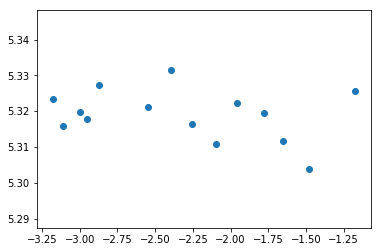

In [46]:
plt.scatter(T,B[:,2])
plt.show()